In [1]:
#Importing all relevant libraries, modules or classes
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
#Importing Boston Dataset from SciKit Library
ds= datasets.load_boston()

In [3]:
#Converting Dataset into DataFrame using Pandas object
ds_X= pd.DataFrame(ds.data, columns=ds.feature_names)
ds_y = pd.DataFrame(ds.target, columns=['Price'])

In [4]:
#Checking Target Variable
ds_y

,Price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [5]:
#Checking Independent Variables or Features
ds_X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [6]:
#Splitting the DataFrame instances into training and test data
X_train, X_test, y_train, y_test = train_test_split(ds_X, ds_y, test_size= .2, random_state= 123)


In [7]:
#Cross-checking the splitted data shape
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404, 1)
(102, 1)


In [8]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
203,0.03510,95.0,2.68,0.0,0.4161,7.853,33.2,5.1180,4.0,224.0,14.7,392.78,3.81
441,9.72418,0.0,18.10,0.0,0.7400,6.406,97.2,2.0651,24.0,666.0,20.2,385.96,19.52
172,0.13914,0.0,4.05,0.0,0.5100,5.572,88.5,2.5961,5.0,296.0,16.6,396.90,14.69
95,0.12204,0.0,2.89,0.0,0.4450,6.625,57.8,3.4952,2.0,276.0,18.0,357.98,6.65
54,0.01360,75.0,4.00,0.0,0.4100,5.888,47.6,7.3197,3.0,469.0,21.1,396.90,14.80


In [9]:
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.556133,11.163366,11.190347,0.056931,0.55548,6.281676,68.974505,3.786204,9.509901,408.445545,18.463861,357.209084,12.825347
std,8.788241,22.973132,6.949621,0.231997,0.11639,0.704875,28.021271,2.138012,8.661394,168.499919,2.148906,91.677481,7.127718
min,0.006320,0.000000,0.460000,0.000000,0.38500,3.561000,6.000000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.081960,0.000000,5.130000,0.000000,0.45200,5.887750,45.325000,2.097050,4.000000,279.000000,17.400000,376.092500,7.187500
50%,0.252775,0.000000,9.690000,0.000000,0.53800,6.201500,77.700000,3.100900,5.000000,330.000000,19.050000,391.955000,11.490000
75%,3.681942,12.500000,18.100000,0.000000,0.62400,6.616500,94.100000,5.117025,24.000000,666.000000,20.200000,396.157500,17.127500
max,88.976200,100.000000,27.740000,1.000000,0.87100,8.725000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [10]:
#Scaling the data using StandardScaler before performing PCA
ss= StandardScaler()
X_train= ss.fit_transform(X_train)
X_test= ss.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(404, 13)
(102, 13)


In [11]:
#Initializing PCA object, fitting and transforming training and test data 
pca= PCA()
X_train = pca.fit_transform(X_train) 
X_test = pca.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(404, 13)
(102, 13)


In [12]:
#Checking the Variance contributed by each of the 13 features
explained_variance= pca.explained_variance_ratio_
explained_variance

array([0.46972918, 0.11056886, 0.09086079, 0.0689075 , 0.06391657,
       0.05079449, 0.04243177, 0.03103191, 0.02175487, 0.01757828,
       0.014412  , 0.01276822, 0.00524556])

<function matplotlib.pyplot.show(close=None, block=None)>

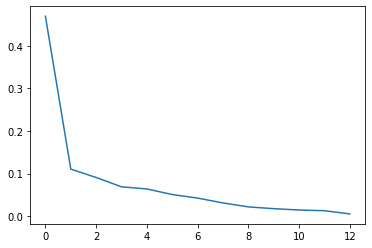

In [13]:
#Plotting the variance (Elbow Analysis)
plt.plot(explained_variance)
plt.show

In [14]:
#Performing PCA with a threshold value of .75
pca1= PCA(.75)
X_train_th1 = pca1.fit_transform(X_train) 
X_test_th1 = pca1.transform(X_test)
print(X_train_th1.shape)
print(X_test_th1.shape)

(404, 5)
(102, 5)


5 Features cover the 75% variance

In [15]:
#Performing PCA with a threshold value of .95
pca2= PCA(.95)
X_train_th2 = pca2.fit_transform(X_train) 
X_test_th2 = pca2.transform(X_test)
print(X_train_th2.shape)
print(X_test_th2.shape)


(404, 10)
(102, 10)


10 Features cover the 95% variance

In [16]:
#Performing Linear Regression on the principal model keeping only 5 attributes contributing to 75% variance
#and predicting price value
print(X_train_th1.shape)
print(y_train.shape)
linear_model1= LinearRegression()
linear_model1.fit(X_train_th1,y_train)
print(linear_model1.intercept_)
print(linear_model1.coef_)
y_pred_1= linear_model1.predict(X_test_th1)

(404, 5)
(404, 1)
[22.37475248]
[[-2.33298306  1.97872535  3.49070518 -1.49737703 -2.57051959]]


In [18]:
#R Squared Value (.75 PCA)
print(linear_model1.score(X_train_th1, y_train))

0.7171322550748915


In [19]:
#Adjusted Squared Value (.75 PCA)
adjusted_r_squared_th1 = 1 - (1-linear_model1.score(X_train_th1, y_train))*(len(X_train_th1)-1)/(len(X_train_th1)-X_train_th1.shape[1]-1)
print(adjusted_r_squared_th1)
#adjusted_r_squared_th1 = 1 - (1-linear_model1.score(X_train_th1, y_train))*(X_train_th1.shape[0]-1)/(X_train_th1.shape[0]-X_train_th1.shape[1]-1)
#print(adjusted_r_squared_th1)

0.7135786401888977


In [20]:
#Performing Linear Regression on the principal model keeping only 10 attributes contributing to 95% variance and predicting price value 
print(X_train_th2.shape)
print(y_train.shape)
linear_model2= LinearRegression()
linear_model2.fit(X_train_th2,y_train)
print(linear_model2.intercept_)
print(linear_model2.coef_)
y_pred_2= linear_model2.predict(X_test_th2)

(404, 10)
(404, 1)
[22.37475248]
[[-2.33298306  1.97872535  3.49070518 -1.49737703 -2.57051959  0.26772581
  -0.59277693  1.02112951  0.51514793  1.14430047]]


In [29]:
#R Squared Value (.95 PCA)
print(linear_model2.score(X_train_th2, y_train))

0.7293616103305641


In [30]:
#Adjusted Squared Value (.95 PCA)
adjusted_r_squared_th2 = 1 - (1-linear_model2.score(X_train_th2, y_train))*(len(X_train_th2)-1)/(len(X_train_th2)-X_train_th2.shape[1]-1)
print(adjusted_r_squared_th2)


0.7224751373109857
